In [2]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir="Original_Images/Original_Images/"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

Found 2562 images belonging to 31 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [5]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

In [7]:
history = model.fit(train_ds,epochs= 30, batch_size=32)

Epoch 1/30
81/81 [==============================] - 85s 1s/step - loss: 3.5032 - accuracy: 0.0843
Epoch 2/30
81/81 [==============================] - 66s 810ms/step - loss: 2.7621 - accuracy: 0.2002
Epoch 3/30
81/81 [==============================] - 65s 805ms/step - loss: 2.2954 - accuracy: 0.3228
Epoch 4/30
81/81 [==============================] - 67s 820ms/step - loss: 1.8899 - accuracy: 0.4317
Epoch 5/30
81/81 [==============================] - 65s 799ms/step - loss: 1.5640 - accuracy: 0.5304
Epoch 6/30
81/81 [==============================] - 64s 797ms/step - loss: 1.3962 - accuracy: 0.5734
Epoch 7/30
81/81 [==============================] - 64s 792ms/step - loss: 1.0044 - accuracy: 0.7053
Epoch 8/30
81/81 [==============================] - 65s 798ms/step - loss: 0.8185 - accuracy: 0.7611
Epoch 9/30
81/81 [==============================] - 64s 788ms/step - loss: 0.5633 - accuracy: 0.8450
Epoch 10/30
81/81 [==============================] - 63s 775ms/step - loss: 0.4609 - accuracy:

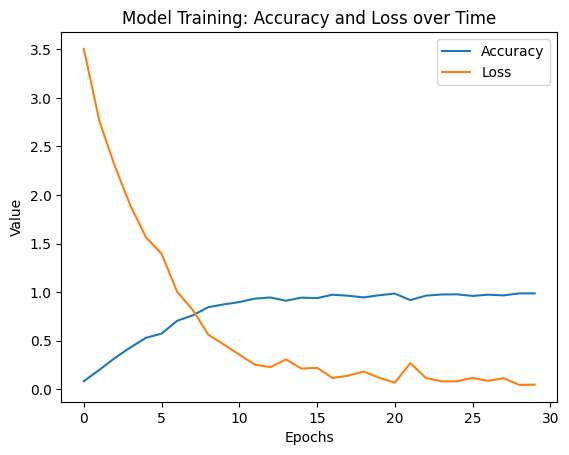

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Model Training: Accuracy and Loss over Time')
plt.legend(['Accuracy', 'Loss'])
plt.show()

In [9]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])

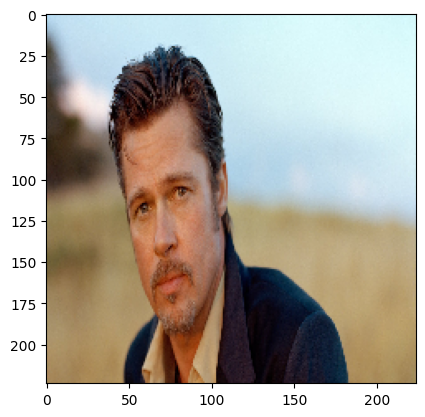

1/1 [==============================] - 0s 206ms/step
Actual: Brad Pitt
Predicted: Brad Pitt


In [10]:
predict_image("Original_Images/Original_Images/Brad Pitt/Brad Pitt_90.jpg")

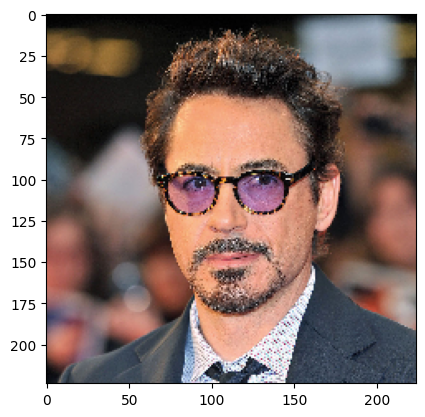

1/1 [==============================] - 0s 27ms/step
Actual: Robert Downey Jr
Predicted: Robert Downey Jr


In [15]:
predict_image("Original_Images/Original_Images/Robert Downey Jr/Robert Downey Jr_110.jpg")